### Import libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

from datetime import datetime

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key
quandl.ApiConfig.api_key = '43PpFxuTzeMJq2H5DSMS'

### Import data

In [3]:
path = '/Users/bobbi/Careerfoundry/Shipping_project/02 Data/Prepared Data'

# Import port data
port_data = pd.read_pickle(os.path.join(path, 'world_ports.pkl'))

# Import world trade data
port_trade = pd.read_pickle(os.path.join(path, 'port_trade_data.pkl'))

In [4]:
# Divide data in subsets: import/ export
# Import
import_port = port_data[port_data['flowCode'] == "M"]

# Export
export_port = port_data[port_data['flowCode'] == "X"]

In [5]:
# Divide data in subsets: import/ export
# Import
import_trade = port_trade[port_trade['flowCode'] == "M"]

# Export
export_trade = port_trade[port_trade['flowCode'] == "X"]

In [6]:
import_trade.head()

,year_month,country,flowCode,vessel_type,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma,date,flowDesc,motDesc,cifvalue,fobvalue,primaryValue,year
0,2015-04,Angola,M,Total,108,1286614.760,2505197,104.532,1324697.711,2610117.464,2015-04-01,Import,Sea,1.413374e+09,1.302496e+09,1.413374e+09,2015
5,2015-04,Mexico,M,Total,237,3111611.700,8227731,234.101,3248505.721,7971538.499,2015-04-01,Import,Sea,0.000000e+00,9.939023e+09,9.939023e+09,2015
7,2015-04,Myanmar,M,Total,34,373379.244,417542,34.365,330222.384,419907.798,2015-04-01,Import,Sea,7.740242e+08,0.000000e+00,7.740242e+08,2015
9,2015-04,Peru,M,Total,216,1822573.767,6753434,200.198,1925403.938,6293247.335,2015-04-01,Import,Sea,2.534524e+09,2.392075e+09,2.534524e+09,2015
11,2015-04,Seychelles,M,Total,10,0.000,278165,9.866,0.000,264176.136,2015-04-01,Import,Sea,2.792527e+07,0.000000e+00,2.792527e+07,2015


In [7]:
# Transform trade data
import_trade_sub = import_trade[['date', 'primaryValue']]

import_trade_sub['datetime'] = pd.to_datetime(import_trade_sub['date'])
import_trade_sub = import_trade_sub.set_index('datetime')
import_trade_sub.drop(['date'], axis=1, inplace=True)
import_trade_sub.head()

,primaryValue
datetime,
2015-04-01,1.413374e+09
2015-04-01,9.939023e+09
2015-04-01,7.740242e+08
2015-04-01,2.534524e+09
2015-04-01,2.792527e+07


In [8]:
import_port.head()

,countryareaCode,country,vesselTypeCode,vessel_type,flowCode,flowDesc,date,num_pc,mtc,dwt,num_pc_ma,mtc_ma,dwt_ma
1000000,470,Malta,7,Foodstuff,M,Imports,2020-11-23,0,0.0,0,0.267,7.613,904.633
1000001,470,Malta,7,Foodstuff,M,Imports,2020-11-24,0,0.0,0,0.267,7.613,904.633
1000002,470,Malta,7,Foodstuff,M,Imports,2020-11-25,0,0.0,0,0.267,7.613,904.633
1000003,470,Malta,7,Foodstuff,M,Imports,2020-11-26,0,0.0,0,0.267,7.613,904.633
1000004,470,Malta,7,Foodstuff,M,Imports,2020-11-27,0,0.0,0,0.267,7.613,904.633


In [9]:
data_sub = import_port[['date', 'num_pc_ma', 'mtc_ma', 'dwt_ma']]

In [10]:
print(data_sub.columns)
data_sub.head()

Index(['date', 'num_pc_ma', 'mtc_ma', 'dwt_ma'], dtype='object')


,date,num_pc_ma,mtc_ma,dwt_ma
1000000,2020-11-23,0.267,7.613,904.633
1000001,2020-11-24,0.267,7.613,904.633
1000002,2020-11-25,0.267,7.613,904.633
1000003,2020-11-26,0.267,7.613,904.633
1000004,2020-11-27,0.267,7.613,904.633


In [11]:
# Transform port data

data_sub['datetime'] = pd.to_datetime(data_sub['date'])
data_sub = data_sub.set_index('datetime')
data_sub.drop(['date'], axis=1, inplace=True)
data_sub.head()

,num_pc_ma,mtc_ma,dwt_ma
datetime,,,
2020-11-23,0.267,7.613,904.633
2020-11-24,0.267,7.613,904.633
2020-11-25,0.267,7.613,904.633
2020-11-26,0.267,7.613,904.633
2020-11-27,0.267,7.613,904.633


In [12]:
df_monthly = data_sub.resample('M').mean()

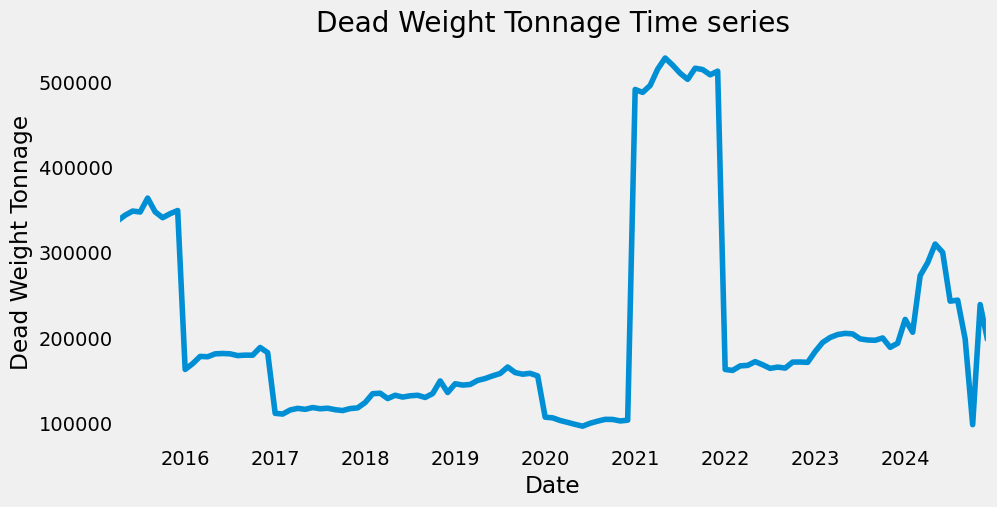

In [13]:
plt.figure(figsize=(10,5))
df_monthly['dwt_ma'].plot()
plt.title('Dead Weight Tonnage Time series')
plt.xlabel('Date')
plt.ylabel('Dead Weight Tonnage')
plt.grid(False)
plt.show()

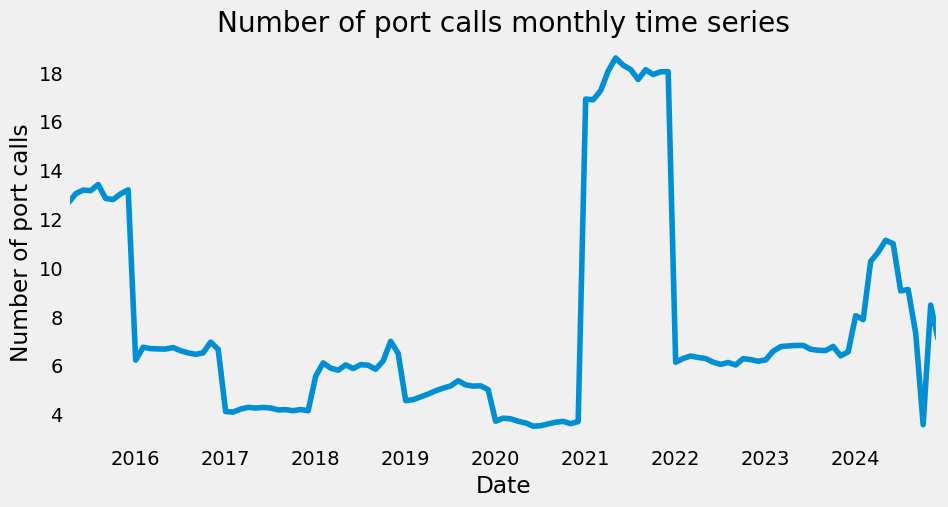

In [14]:
plt.figure(figsize=(10,5))
df_monthly['num_pc_ma'].plot()
plt.title('Number of port calls monthly time series')
plt.xlabel('Date')
plt.ylabel('Number of port calls')
plt.grid(False)
plt.show()

#### Decomposition

In [15]:
# Decomposition of dead weight tonnage 
decomposition = sm.tsa.seasonal_decompose(df_monthly['mtc_ma'], model='additive', period=7)

In [16]:
print("Trend component:")
print(decomposition.trend.head())

Trend component:
datetime
2015-04-30              NaN
2015-05-31              NaN
2015-06-30              NaN
2015-07-31    108602.054291
2015-08-31    108798.772540
Freq: ME, Name: trend, dtype: float64


In [17]:
print("\nSeasonal component:")
print(decomposition.seasonal.head())


Seasonal component:
datetime
2015-04-30    3391.872263
2015-05-31    1040.874344
2015-06-30    -838.144011
2015-07-31     847.405494
2015-08-31   -3878.083405
Freq: ME, Name: seasonal, dtype: float64


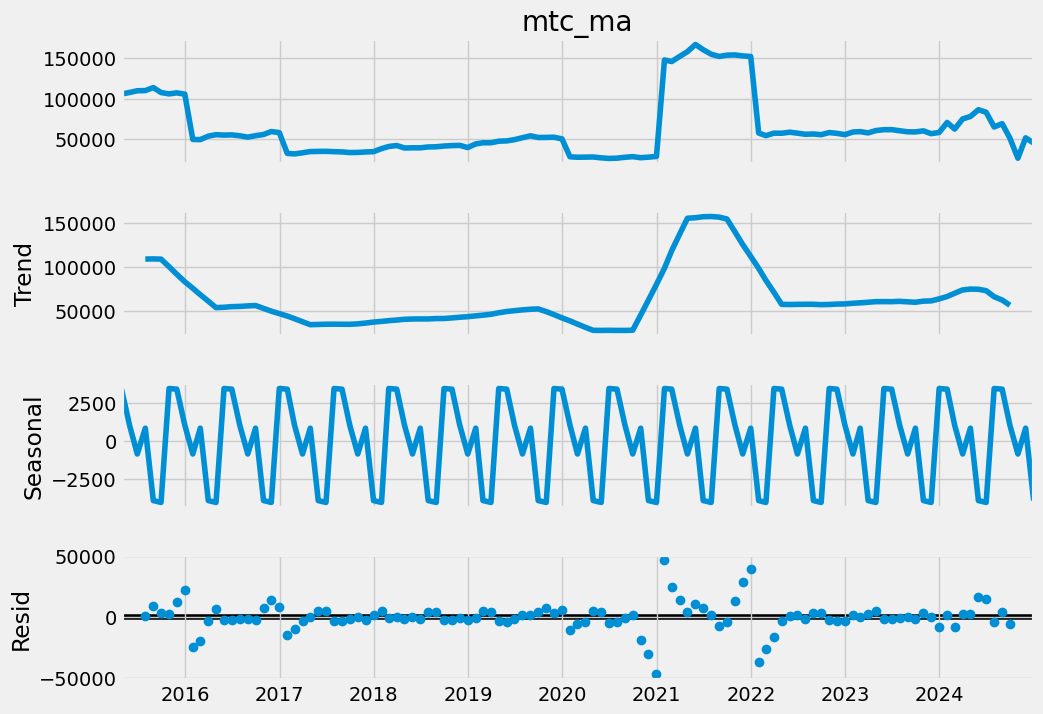

In [18]:
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In the top panel (Level), the metric ton capacity (“mtc”) starts near 100,000 in 2015, drops to around 50,000, and remains fairly stable until a notable spike around 2021. After this peak, values settle again—though higher than their earlier lows. The Trend plot reinforces this observation: a downward slope from 2015 to roughly 2017 gives way to a long, flat stretch, followed by a significant rise and a gradual decrease by 2022–2023. The Seasonal component displays a repeating cycle with an amplitude of around ±2,500, indicating consistent short‐term fluctuations. Finally, the Residual highlights sporadic outliers, especially in 2016 and again between 2021–2022, suggesting unique events or disruptions that neither the trend nor the standard seasonal pattern can explain.

In [19]:
# Port calls decomposition
decomposition_pc = sm.tsa.seasonal_decompose(df_monthly['num_pc_ma'], model='additive', period=7)

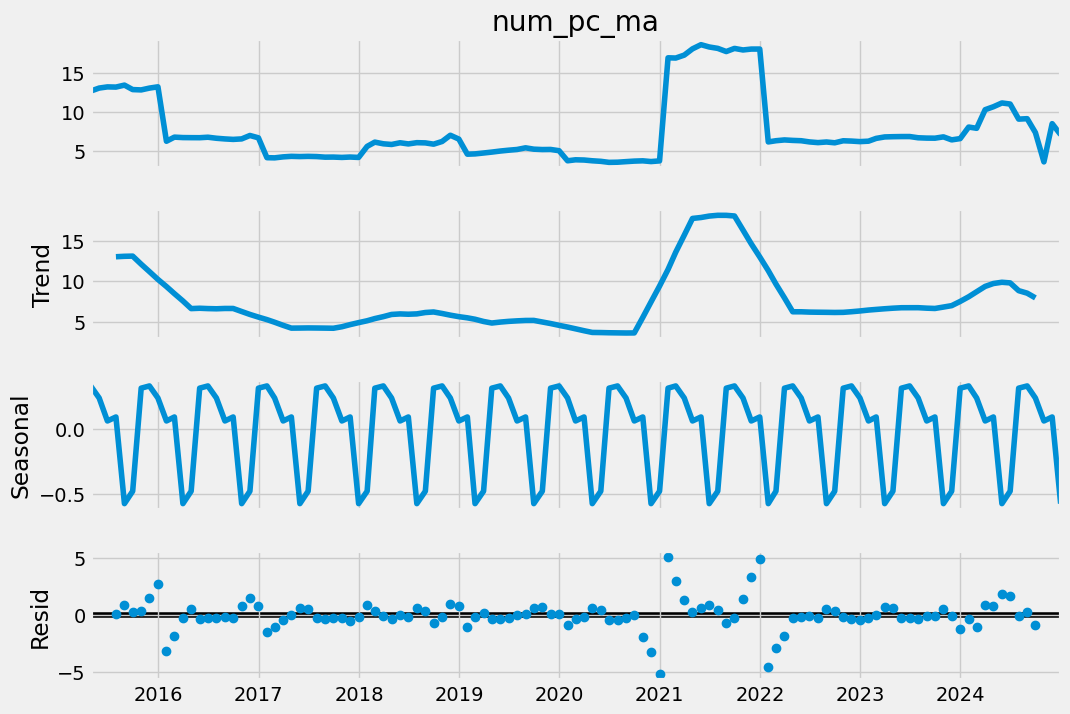

In [20]:
fig = decomposition_pc.plot()
fig.set_size_inches(12, 8)
plt.show()

Here, the “number of port calls” metric shows a similar pattern of stability punctuated by a jump around 2021. The Trend indicates an initial downward slope from about 15 calls to below 10, gradually rebounding later on. A sharp increase in the observed data around 2021 is also mirrored in the trend. The Seasonal pattern again has a consistent up‐and‐down rhythm, suggesting cyclical behavior—likely monthly or weekly. The Residual spikes align with that 2021–2022 window, implying notable events affecting the number of port calls that go beyond typical seasonal cycles.

In [21]:
# Port calls decomposition
decomposition_dwt = sm.tsa.seasonal_decompose(df_monthly['dwt_ma'], model='additive', period=7)

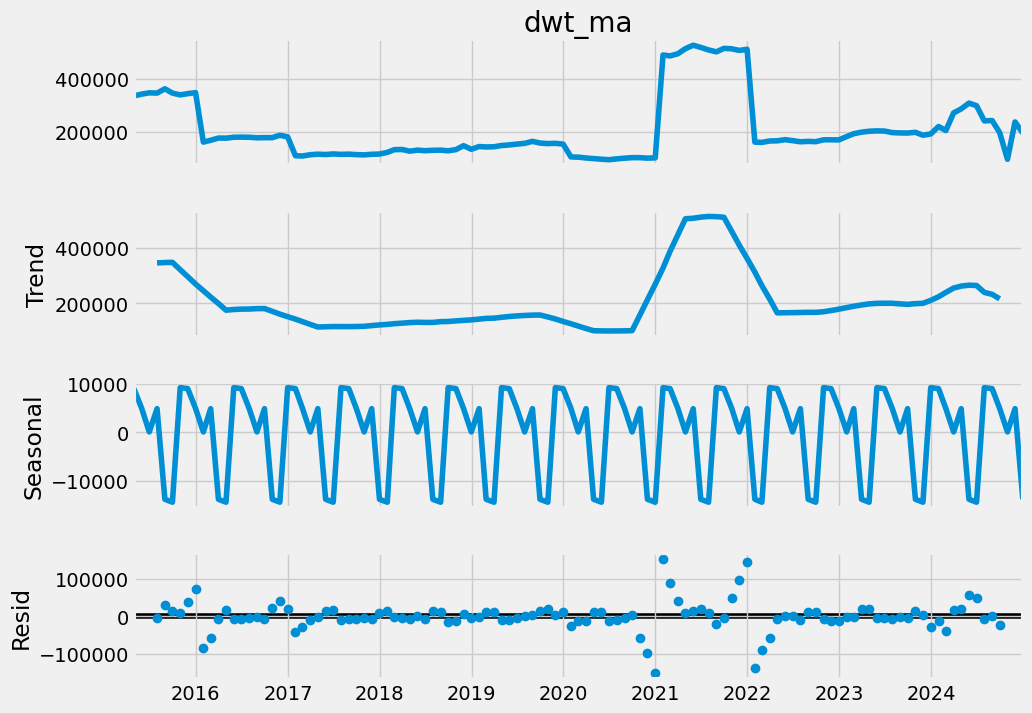

In [22]:
fig = decomposition_dwt.plot()
fig.set_size_inches(12, 8)
plt.show()

This figure shows how dead‐weight tonnage (DWT) evolves over time. The Level series (top panel) remains fairly stable until around 2020–2021, where it spikes significantly, then settles at a slightly higher level. In the Trend panel, we see an overall decline from 2015 to about 2019, followed by a noticeable uptick around 2021, before it tapers off again. The Seasonal component exhibits a repeated cycle (set by the chosen period=7), reflecting short‐term fluctuations that appear regularly throughout each year or week (depending on how the data is structured). Finally, the Residual captures variations not explained by the trend or seasonality; the larger peaks around 2021–2022 suggest unique events or possible anomalies during those periods.

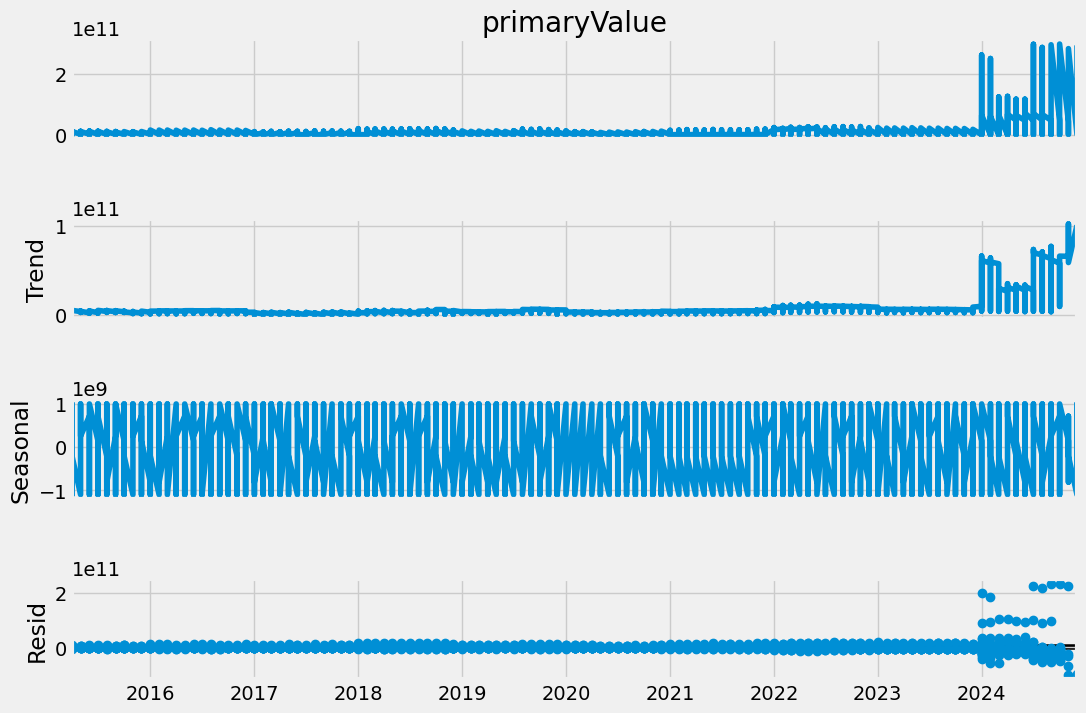

In [23]:
# Decomposition of primary value
decomposition_pv = sm.tsa.seasonal_decompose(import_trade_sub['primaryValue'], model='additive', period=7)
fig = decomposition_pv.plot()
fig.set_size_inches(12, 8)
plt.show()

Because this variable spans a much larger numerical range (on the order of 10^11), the top panel looks almost flat until a jump near 2023–2024. The Trend also sits around 10^11 for most of the series, then rises in late 2022. The Seasonal component appears large in absolute terms (on the order of 10^9), but relatively small compared to the overall scale. The Residual remains close to zero until it spikes around the same time the observed data does, suggesting large, possibly sudden changes in trade value that traditional trend and seasonal components do not fully capture.

In general, each decomposition helps isolate longer‐term moves (Trend) from short, repeating patterns (Seasonal) and unexplained fluctuations (Residual). Sudden shocks or irregular events often show up as big swings in the residual. By comparing the scale of Seasonal vs. Trend components, we can see whether a variable experiences pronounced cyclical effects (like num_pc_ma) or whether it is dominated by longer‐term shifts (like primaryValue).

#### Testing stationary data

In [24]:
# Conduct a Dickey-Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test on the time series
dickey_fuller(df_monthly['num_pc_ma'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -2.677622
p-value                          0.077991
Number of Lags Used              0.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


Null hypothesis: the presence of a root unit.

Alternative hypothesis: there is no root unit (root unit is any jump that can't be explained by variation)

The test statistic is not sufficiently negative to surpass the 1% or 5% critical values, so at those significance levels we fail to reject the null of a unit root. That implies the series is (likely) non‐stationary at the 1% or 5% level. If, however, the statistic just barely crosses the 10% critical value, one might reject the null at 10%—but that is a weaker confidence threshold.

In [25]:
# Apply the test on the time series
dickey_fuller(import_trade_sub['primaryValue'])

Dickey-Fuller Stationarity Test:
Test Statistic                    2.206022
p-value                           0.998887
Number of Lags Used              23.000000
Number of Observations Used    1539.000000
Critical Value (1%)              -3.434606
Critical Value (5%)              -2.863420
Critical Value (10%)             -2.567771
dtype: float64


The test statistic is greater than the critical values at the 1%, 5%, and 10% levels. Since the test statistic exceeds these critical values, we cannot reject the null hypothesis. This indicates that there is a unit root in the data, confirming that it is non-stationary.

##### Stationary for port data

In [26]:
# Stationarize the data by using the differencing technique
port_diff = df_monthly - df_monthly.shift(1)

# Remove any mising values as a result of the differencing
port_diff.dropna(inplace=True)

In [27]:
port_diff.head()

,num_pc_ma,mtc_ma,dwt_ma
datetime,,,
2015-05-31,0.388723,1838.066850,6735.279137
2015-06-30,0.149241,2145.070961,4803.593854
2015-07-31,-0.024140,171.166876,-1079.286547
2015-08-31,0.252538,3698.761369,16319.280713
2015-09-30,-0.572750,-6078.945577,-16204.606546


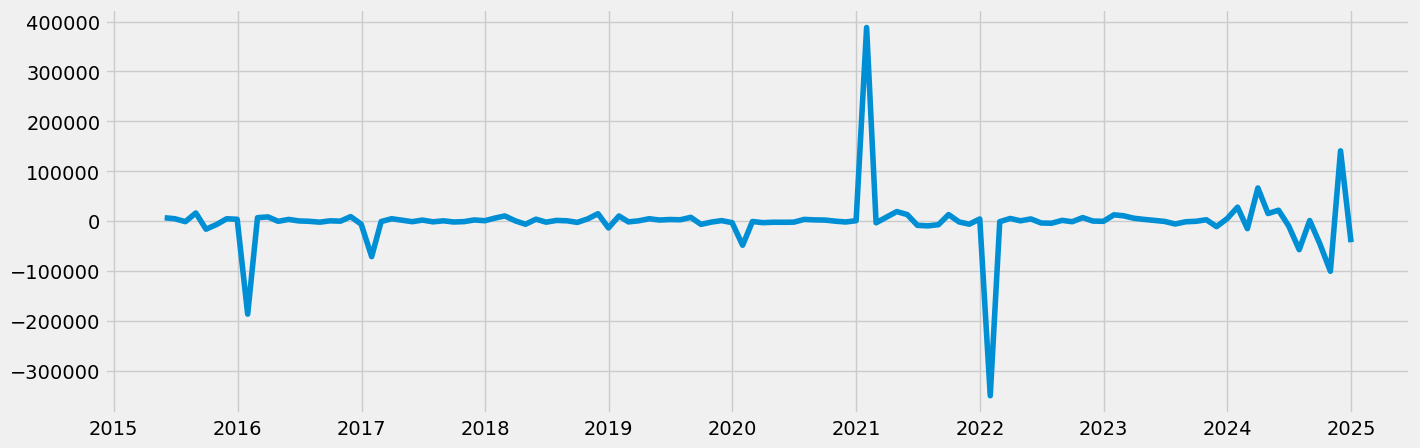

In [28]:
# Plot the time series to see what the effect of the differencing
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(port_diff['dwt_ma'])

In [29]:
# Recheck for stationarity by running another Dickey_Fuller test
dickey_fuller(port_diff['mtc_ma'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -4.890042
p-value                          0.000036
Number of Lags Used             11.000000
Number of Observations Used    104.000000
Critical Value (1%)             -3.494850
Critical Value (5%)             -2.889758
Critical Value (10%)            -2.581822
dtype: float64


The test statistic is smaller than the critical value (10%) and a satisfactory p-value of <0.05, indicating there is no root unit and the series is stationary. 

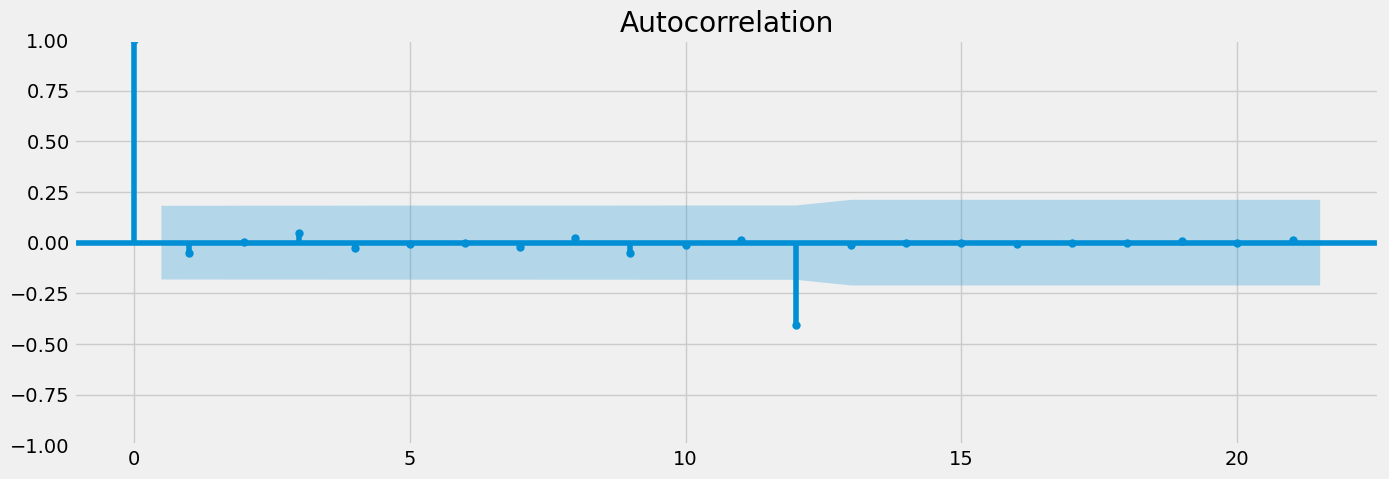

In [30]:
# Check the data's autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
fig, ax = plt.subplots(figsize=(15,5))
plot_acf(port_diff['dwt_ma'], ax=ax)
plt.show()

From this ACF plot, there’s essentially no strong autocorrelation at most lags: almost all bars fall within the blue confidence band, indicating they are not statistically different from zero. The single “spike” at lag 10 is slightly outside the band (negative), suggesting a mild correlation at that specific lag but otherwise not much structure in the series.

In practical terms, this implies that:

The differenced series (here, port_diff['dwt_ma']) behaves largely like white noise, with minimal leftover autocorrelation at most lags.
If you’re looking to model or forecast this series, you likely wouldn’t need many (if any) AR terms—though you might pay attention to that lag 10 effect if it’s consistently showing up across other diagnostics.
Overall, one negative autocorrelation spike can mean a periodic effect or a quirk of the data, but the rest of the autocorrelations hover near zero, consistent with a (mostly) stationary differenced series.

##### Stationary for trade data

In [31]:
# Stationarize the data by using the differencing technique
trade_diff = import_trade_sub - import_trade_sub.shift(1)

# Remove any mising values as a result of the differencing
trade_diff.dropna(inplace=True)

In [32]:
trade_diff.head()

,primaryValue
datetime,
2015-04-01,8.525649e+09
2015-04-01,-9.164999e+09
2015-04-01,1.760499e+09
2015-04-01,-2.506598e+09
2015-04-01,5.523671e+09


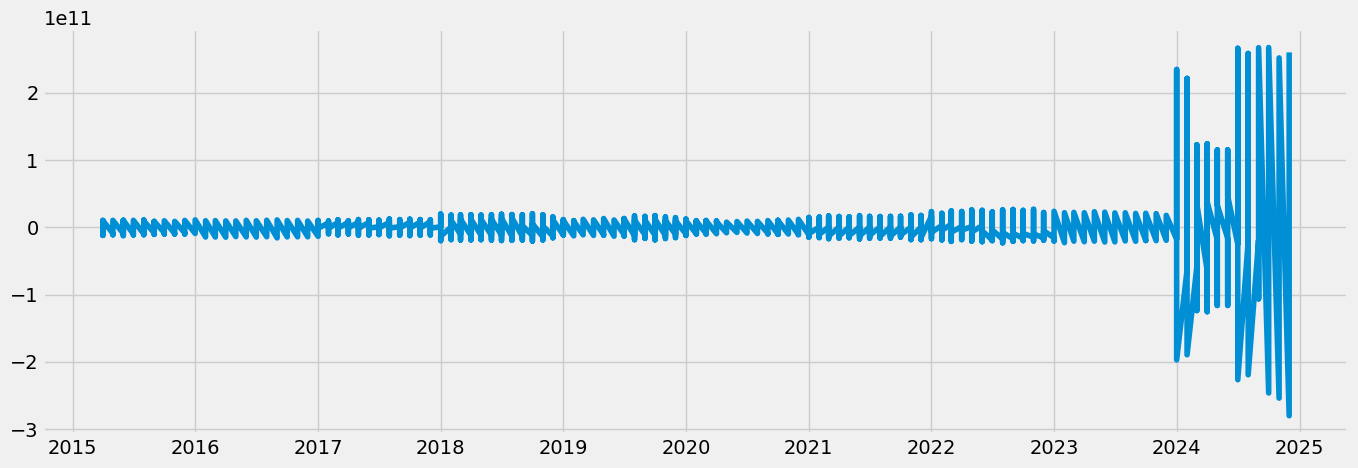

In [33]:
# Plot the time series to see what the effect of the differencing
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(trade_diff)

In [34]:
dickey_fuller(trade_diff)

Dickey-Fuller Stationarity Test:
Test Statistic                -1.410874e+01
p-value                        2.541952e-26
Number of Lags Used            2.400000e+01
Number of Observations Used    1.537000e+03
Critical Value (1%)           -3.434612e+00
Critical Value (5%)           -2.863422e+00
Critical Value (10%)          -2.567772e+00
dtype: float64


Data is still not stationary so I will perform another round of differentiation

In [35]:
# Stationarize the data by using the differencing technique
trade_diff_2 = trade_diff - trade_diff.shift(1)

# Remove any mising values as a result of the differencing
trade_diff_2.dropna(inplace=True)

In [36]:
trade_diff_2.head()

,primaryValue
datetime,
2015-04-01,-1.769065e+10
2015-04-01,1.092550e+10
2015-04-01,-4.267098e+09
2015-04-01,8.030270e+09
2015-04-01,-1.051681e+10


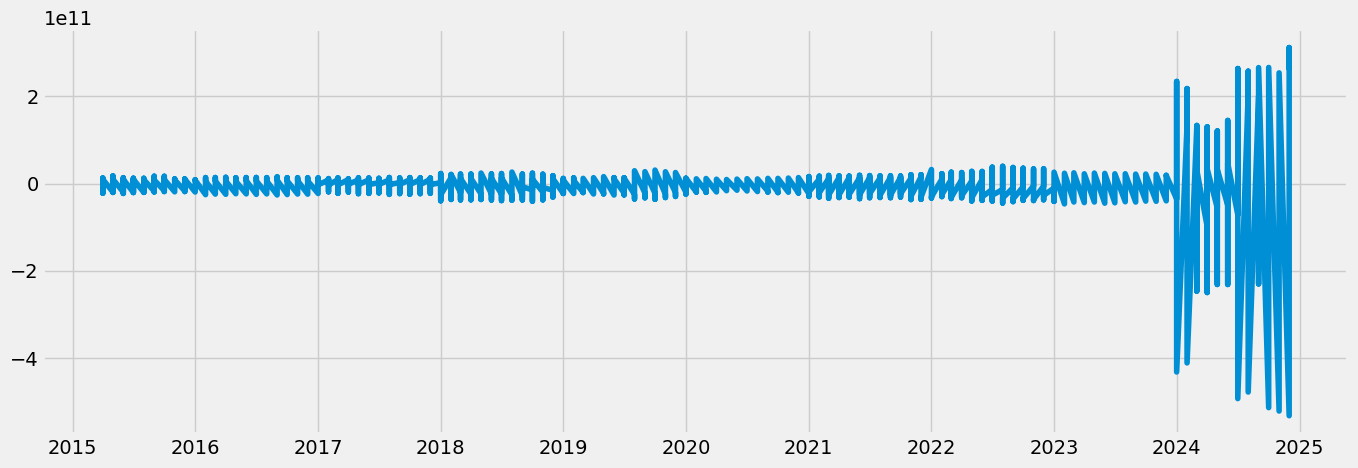

In [37]:
# Plot the time series to see what the effect of the differencing
plt.figure(figsize=(15,5), dpi = 100)
plt.plot(trade_diff_2)

In [38]:
dickey_fuller(trade_diff_2)

Dickey-Fuller Stationarity Test:
Test Statistic                  -21.283766
p-value                           0.000000
Number of Lags Used              22.000000
Number of Observations Used    1538.000000
Critical Value (1%)              -3.434609
Critical Value (5%)              -2.863421
Critical Value (10%)             -2.567771
dtype: float64


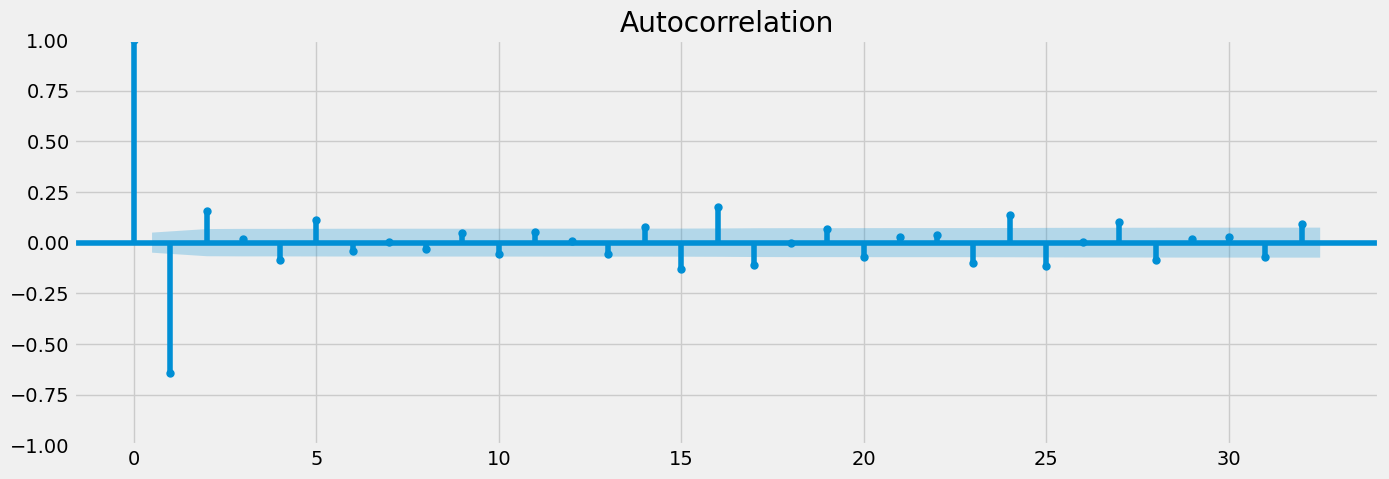

In [40]:
# Check the data's autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
fig, ax = plt.subplots(figsize=(15,5))
plot_acf(trade_diff_2, ax=ax)
plt.show()

From this ACF plot of your second‐differenced series (trade_diff_2):

* A large negative spike at lag 1, which is quite common when a series is differenced more than once. Over‐differencing often introduces strong negative autocorrelation at lag 1.
* Beyond lag 1, most points remain within the confidence bands, suggesting little remaining autocorrelation for higher lags.

Interpretation:
* The strong negative lag 1 correlation typically indicates a second‐differenced process (or possible over‐differencing).
* Apart from that spike, the series looks close to white noise—i.e., most lags are insignificant.
* Practically, this implies the second differencing has (largely) removed trend and autocorrelation, but it may also have introduced that strong negative spike. If your goal is a stationary series, it’s probably good—but double‐check whether first differencing alone was sufficient, as second differencing can sometimes “overshoot” and reduce model interpretability.

### Bonus exercise

In [45]:
from statsmodels.tsa.arima.model import ARIMA

Splitting around January 2022 is a good 70/30 or 80/20 approach for a 2015–2024 dataset.

In [54]:
split_date = '2022-01-01'
train_data = port_diff['dwt_ma'][:split_date]
test_data = port_diff['dwt_ma'][split_date:]

In [55]:
# ARIMA(1, 1, 1)
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 dwt_ma   No. Observations:                   80
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -968.952
Date:                Wed, 05 Mar 2025   AIC                           1943.904
Time:                        14:19:52   BIC                           1951.012
Sample:                    05-31-2015   HQIC                          1946.752
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0316      0.715     -0.044      0.965      -1.433       1.370
ma.L1         -0.9574      0.157     -6.091      0.000      -1.266      -0.649
sigma2      3.153e+09   6.03e-10   5.23e+18      0.0

In [56]:
forecast = model_fit.forecast(steps=len(test_data))

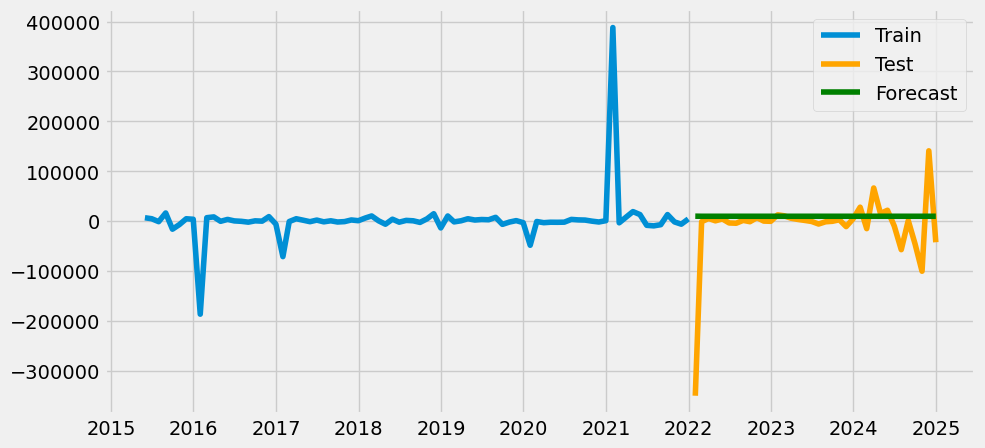

In [57]:
plt.figure(figsize=(10,5))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.show()

The model captures neither the big jump nor dips after 2022, implying it’s not flexible enough for those rapid changes.

In [59]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)

Test RMSE: 69927.52613919927


The Test RMSE is ≈ 69,927, which indicates, on average, the forecast is off by around 70k in whatever units your differenced DWT is measured in. The data regularly varies by hundreds of thousands, therefore might not be accepted.